#Nomor 1 - Exploratory Data Analysis

##General EDA

In [341]:
# Import module yang kita perlu

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit

In [342]:
# Menampilkan 50 elemen pertama dari dataset

df = pd.read_csv('employee_resign.csv')
from google.colab.data_table import DataTable
DataTable.max_columns = 50
df.head(50)

,age,resign,division,home_distance,education,employee_id,score_environment,major,gender,hourly_rate,...,rate_performance,score_work_relationahip,working_hours,time_total_working,last_year_training_time,score_work_life_balance,time_current_company,time_current_role,time_last_promotion,time_current_manager
0,41,Yes,Marketing,1,2,FT1310001,2,Life Sciences,Female,94,...,3,1,40,8,0,1,6,4,0,5
1,49,No,Health and Technology,8,1,FT1010002,3,Life Sciences,Male,61,...,4,4,40,10,3,3,10,7,1,7
2,37,Yes,Health and Technology,2,2,FT1110004,4,Other,Male,92,...,3,2,40,7,3,3,0,0,0,0
3,33,No,Health and Technology,3,4,FT1110005,4,Life Sciences,Female,56,...,3,3,40,8,3,3,8,7,3,0
4,27,No,Health and Technology,2,1,FT1010007,1,Computer Science,Male,40,...,3,4,40,6,3,3,2,2,2,2
5,32,No,Health and Technology,2,2,FT1210008,4,Life Sciences,Male,79,...,3,3,40,8,2,2,7,7,3,6
6,59,No,Health and Technology,3,3,FT1310010,3,Computer Science,Female,81,...,4,1,40,12,3,2,1,0,0,0
7,30,No,Health and Technology,24,1,FT1110011,4,Life Sciences,Male,67,...,4,2,40,1,2,3,1,0,0,0
8,38,No,Health and Technology,23,3,FT1010012,4,Life Sciences,Male,44,...,4,2,40,10,2,3,9,7,1,8
9,36,No,Health and Technology,27,3,FT1310013,3,Computer Science,Male,94,...,3,2,40,17,3,2,7,7,7,7


In [343]:
# Menampilkan shape dari dataset

total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

Jumlah data: 1470
Jumlah atribut: 30


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   age                          1470 non-null   int64 
 1   resign                       1470 non-null   object
 2   division                     1470 non-null   object
 3   home_distance                1470 non-null   int64 
 4   education                    1470 non-null   int64 
 5   employee_id                  1470 non-null   object
 6   score_environment            1470 non-null   int64 
 7   major                        1470 non-null   object
 8   gender                       1470 non-null   object
 9   hourly_rate                  1470 non-null   int64 
 10  score_contribution           1470 non-null   int64 
 11  job_rank                     1470 non-null   int64 
 12  role                         1470 non-null   object
 13  score_job_satisfication      1470

In [345]:
df.describe()

,age,home_distance,education,score_environment,hourly_rate,score_contribution,job_rank,score_job_satisfication,monthly_income,companies_count,...,rate_performance,score_work_relationahip,working_hours,time_total_working,last_year_training_time,score_work_life_balance,time_current_company,time_current_role,time_last_promotion,time_current_manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,2.693197,...,3.153741,2.712245,40.0,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.360824,1.081209,0.0,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,1.000000,40.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,3.000000,2.000000,40.0,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,3.000000,3.000000,40.0,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,3.000000,4.000000,40.0,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,4.000000,40.0,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [346]:
df.describe(include = ["object"])

,resign,division,employee_id,major,gender,role,marriage_status,underage,over_time
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,1470,6,2,9,3,1,2
top,No,Health and Technology,FT1310001,Life Sciences,Male,Sales Executive,Married,No,No
freq,1233,961,1,606,882,326,673,1470,1054


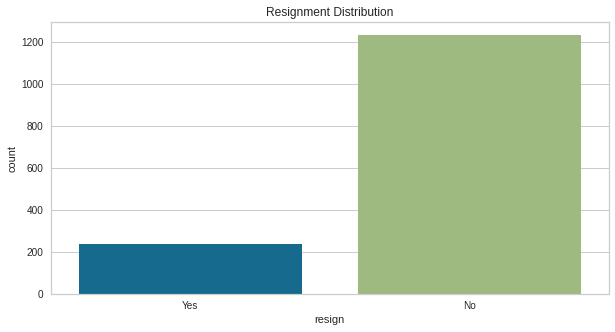

In [347]:
fig , ax = plt.subplots(figsize=(10,5))
sns.countplot(x='resign', data=df)
plt.title("Resignment Distribution")
plt.show()

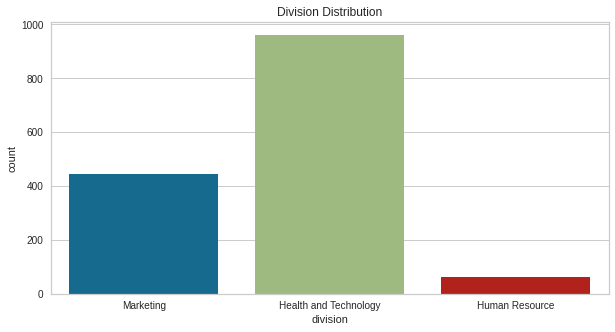

In [348]:
fig , ax = plt.subplots(figsize=(10,5))
sns.countplot(x='division', data=df)
plt.title("Division Distribution")
plt.show()

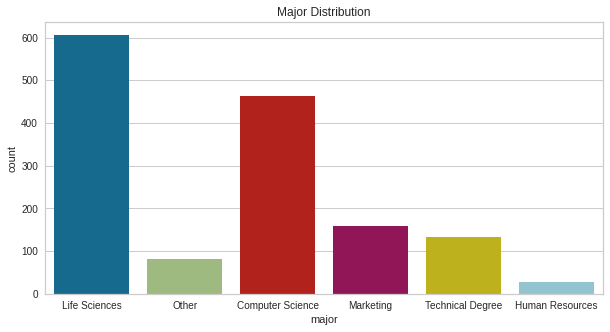

In [349]:
fig , ax = plt.subplots(figsize=(10,5))
sns.countplot(x='major', data=df)
plt.title("Major Distribution")
plt.show()

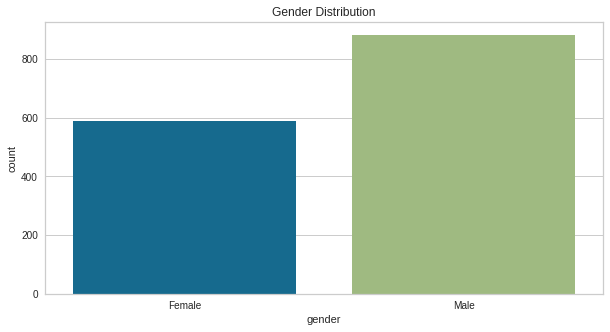

In [350]:
fig , ax = plt.subplots(figsize=(10,5))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

In [351]:
df_marketing = df[(df.division == "Marketing")]
df_hat = df[(df.division == "Health and Technology")]
df_hr = df[(df.division == "Human Resource")]

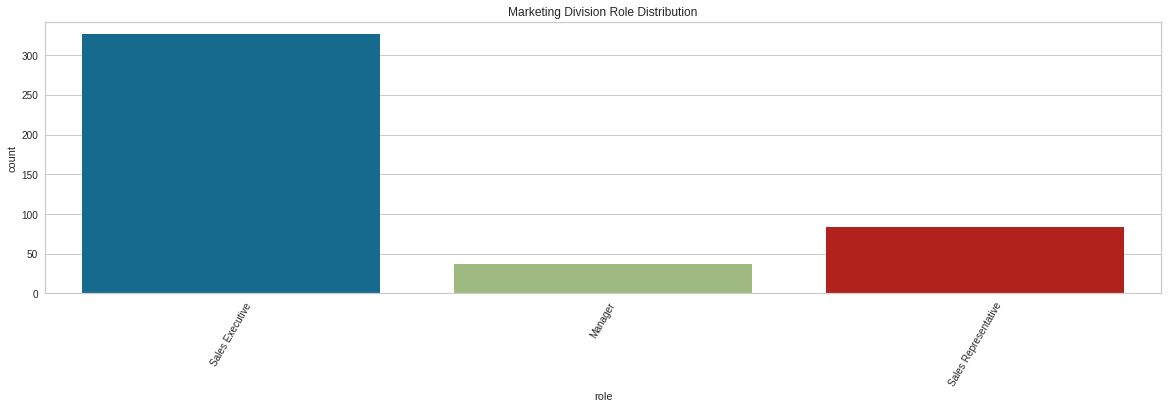

In [352]:
fig , ax = plt.subplots(figsize=(20,5))
sns.countplot(x='role', data=df_marketing)
plt.title("Marketing Division Role Distribution")
plt.xticks(rotation=60)
plt.show()

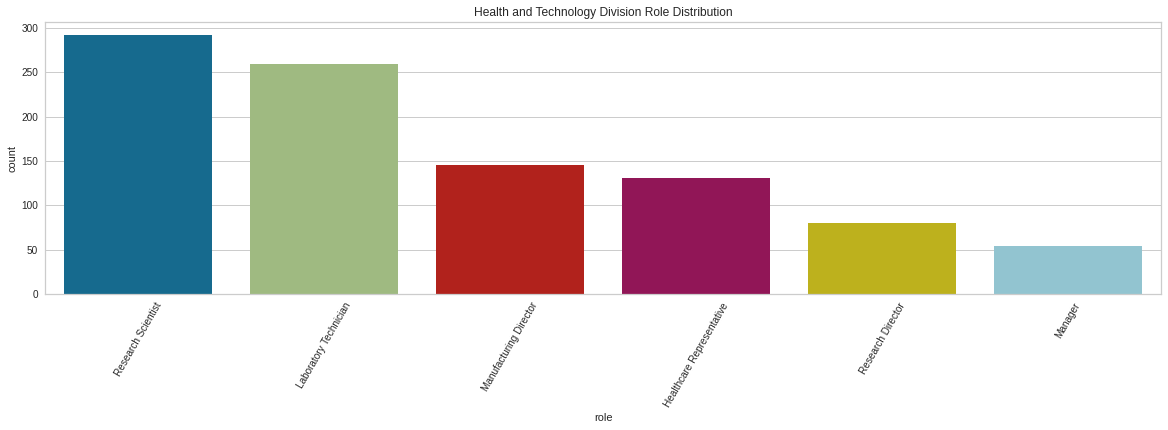

In [353]:
fig , ax = plt.subplots(figsize=(20,5))
sns.countplot(x='role', data=df_hat)
plt.title("Health and Technology Division Role Distribution")
plt.xticks(rotation=60)
plt.show()

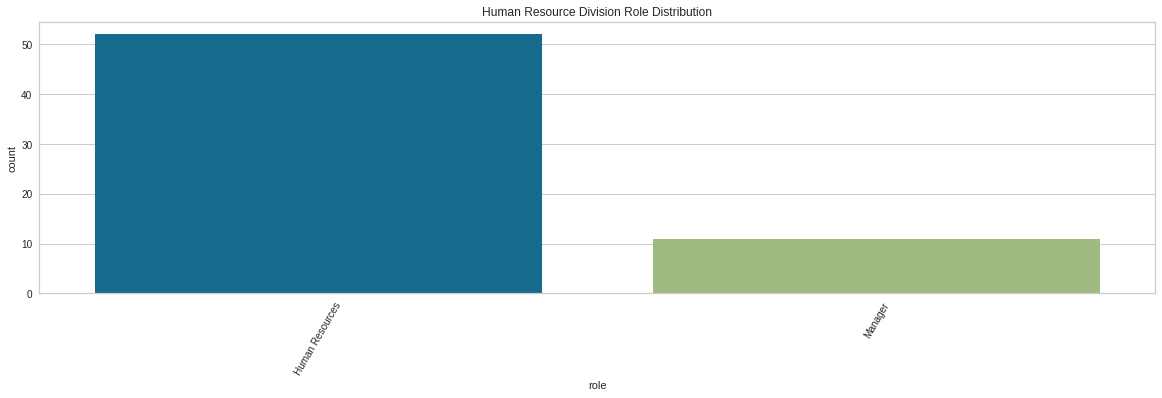

In [354]:
fig , ax = plt.subplots(figsize=(20,5))
sns.countplot(x='role', data=df_hr)
plt.title("Human Resource Division Role Distribution")
plt.xticks(rotation=60)
plt.show()

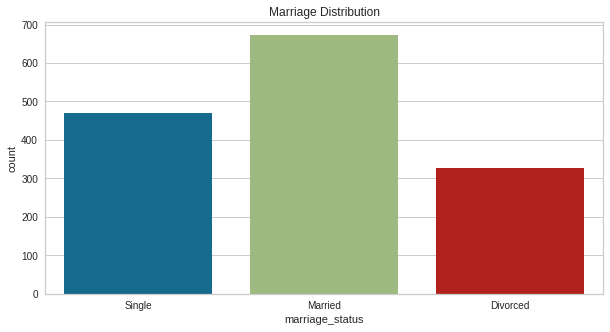

In [355]:
fig , ax = plt.subplots(figsize=(10,5))
sns.countplot(x='marriage_status', data=df)
plt.title("Marriage Distribution")
plt.show()

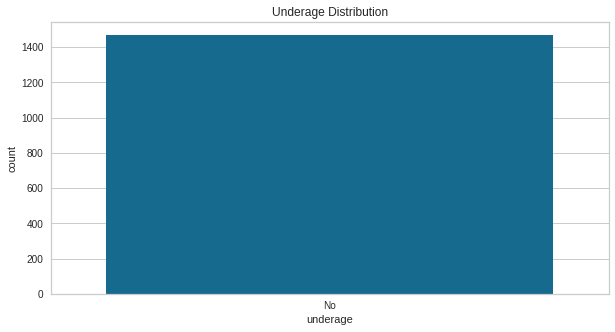

In [356]:
fig , ax = plt.subplots(figsize=(10,5))
sns.countplot(x='underage', data=df)
plt.title("Underage Distribution")
plt.show()

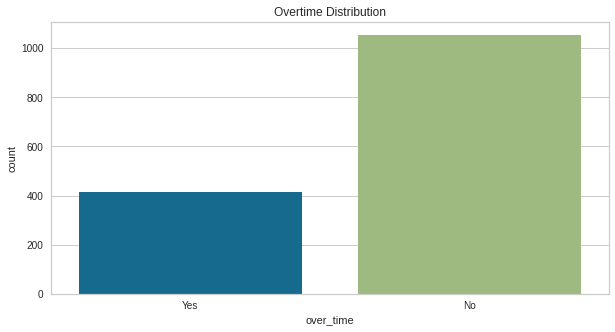

In [357]:
fig , ax = plt.subplots(figsize=(10,5))
sns.countplot(x='over_time', data=df)
plt.title("Overtime Distribution")
plt.show()

##Eksplorasi Soal

In [358]:
# Drop underage, working_hours, employee_id
df2 = df.copy()

df2 = df2.drop('underage', axis=1)
df2 = df2.drop('working_hours', axis=1)
df2 = df2.drop('employee_id', axis=1)

###A. Visualisasikan karakteristik karyawan yang resign dari perusahaan tersebut!

In [359]:
df2_yes = df2[(df2.resign == "Yes")]
df2_no = df2[(df2.resign == "No")]

In [360]:
def check_distribution_with_mode(feature_name):

  mean_resign = df2_yes[feature_name].mean()
  mean_noresign = df2_no[feature_name].mean()
  mode_resign = df2_yes[feature_name].mode()[0]
  mode_noresign = df2_no[feature_name].mode()[0]

  print("====== Mean of", feature_name, "=======")
  print("Will Resign :", mean_resign)
  print("Wont Resign :", mean_noresign)
  print()
  print("====== Mode of", feature_name, "=======")
  print("Will Resign :", mode_resign)
  print("Wont Resign :", mode_noresign)
  print()
  a = df2_yes[feature_name]
  b = df2_no[feature_name]
  plt.figure(figsize=(10,5))
  p = sns.kdeplot(a, shade=True, color="red")
  q = sns.kdeplot(b, shade=True, color="green")
  ticks = max(max(p.get_yticks()), max(q.get_yticks()))
  plt.vlines(x=mean_resign, ymin=0, ymax=ticks, color='red', linestyle='--')
  plt.vlines(x=mean_noresign, ymin=0, ymax=ticks, color='green', linestyle='--')
  plt.show()

In [361]:
def check_distribution(feature_name):

  mean_resign = df2_yes[feature_name].mean()
  mean_noresign = df2_no[feature_name].mean()

  print("====== Mean of", feature_name, "=======")
  print("Will Resign :", mean_resign)
  print("Wont Resign :", mean_noresign)
  print()
  a = df2_yes[feature_name]
  b = df2_no[feature_name]
  plt.figure(figsize=(10,5))
  p = sns.kdeplot(a, shade=True, color="red")
  q = sns.kdeplot(b, shade=True, color="green")
  ticks = max(max(p.get_yticks()), max(q.get_yticks()))
  plt.vlines(x=mean_resign, ymin=0, ymax=ticks, color='red', linestyle='--')
  plt.vlines(x=mean_noresign, ymin=0, ymax=ticks, color='green', linestyle='--')
  plt.show()

In [362]:
def check_dist_c(feature_name, arr1, arr2, _labels):
  y = np.array(arr1)
  plt.pie(y, labels = _labels, radius = 1.6)
  plt.legend(title = feature_name + " - (Resign):")
  plt.show()
  y = np.array(arr2)
  plt.pie(y, labels = _labels, radius = 1.6)
  plt.legend(title = feature_name + " - (Wont Resign):")
  plt.show()

====== Mean of age =======
Will Resign : 33.607594936708864
Wont Resign : 37.561232765612324

====== Mode of age =======
Will Resign : 29
Wont Resign : 34



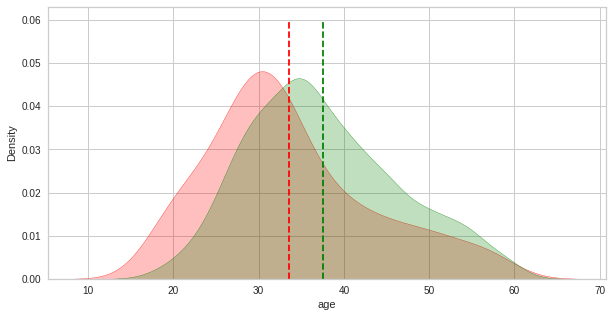

In [363]:
check_distribution_with_mode("age")

====== Mean of home_distance =======
Will Resign : 10.632911392405063
Wont Resign : 8.915652879156529

====== Mode of home_distance =======
Will Resign : 2
Wont Resign : 2



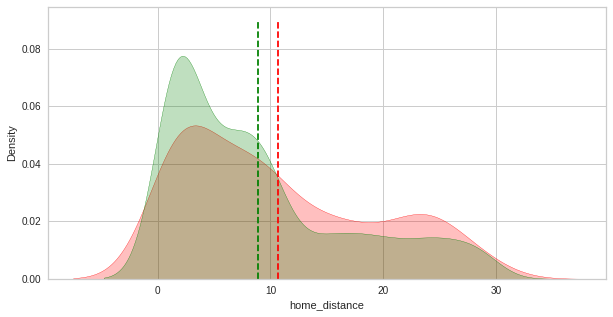

In [364]:
check_distribution_with_mode("home_distance")

====== Mean of education =======
Will Resign : 2.839662447257384
Wont Resign : 2.927007299270073

====== Mode of education =======
Will Resign : 3
Wont Resign : 3



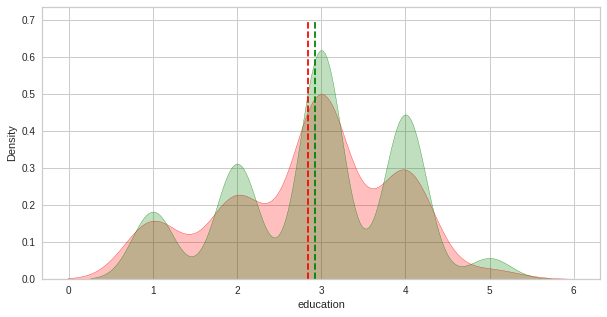

In [365]:
check_distribution_with_mode("education")

====== Mean of score_environment =======
Will Resign : 2.4641350210970465
Wont Resign : 2.7712895377128954

====== Mode of score_environment =======
Will Resign : 1
Wont Resign : 3



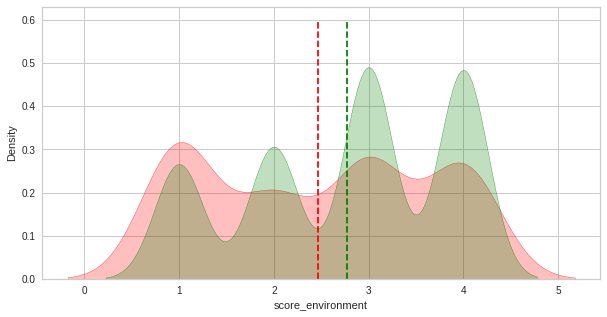

In [366]:
check_distribution_with_mode("score_environment")

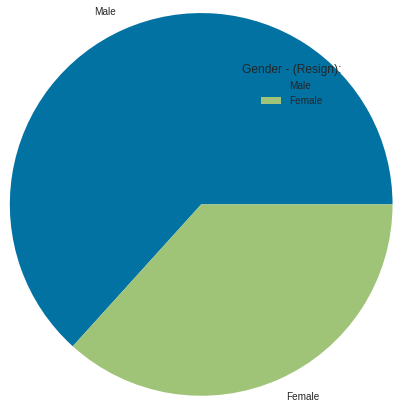

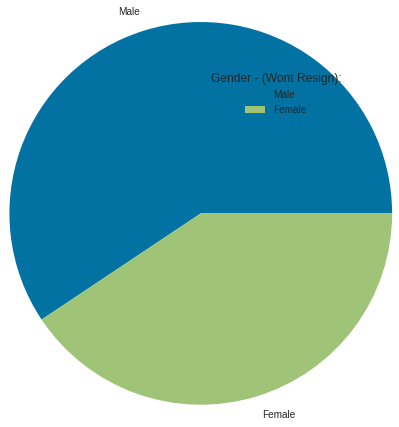

In [367]:
y11 = len(df2_yes[(df2_yes.gender == "Male")])
y12 = len(df2_yes[(df2_yes.gender == "Female")])
y21 = len(df2_no[(df2_no.gender == "Male")])
y22 = len(df2_no[(df2_no.gender == "Female")])

check_dist_c("Gender", [y11, y12], [y21, y22], ["Male", "Female"])

====== Mean of hourly_rate =======
Will Resign : 65.57383966244726
Wont Resign : 65.9521492295215



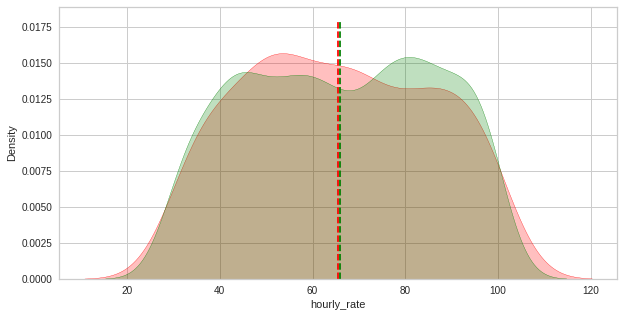

In [368]:
check_distribution("hourly_rate")

====== Mean of score_contribution =======
Will Resign : 2.518987341772152
Wont Resign : 2.770478507704785

====== Mode of score_contribution =======
Will Resign : 3
Wont Resign : 3



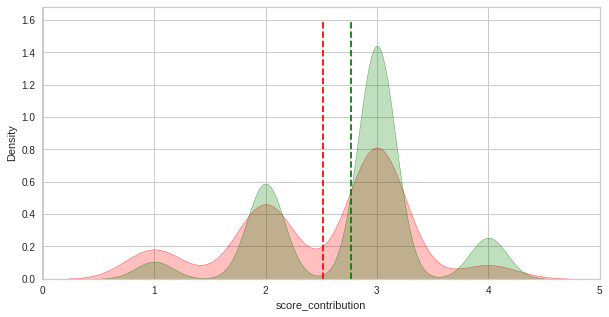

In [369]:
check_distribution_with_mode("score_contribution")

====== Mean of job_rank =======
Will Resign : 1.6371308016877637
Wont Resign : 2.145985401459854

====== Mode of job_rank =======
Will Resign : 1
Wont Resign : 2



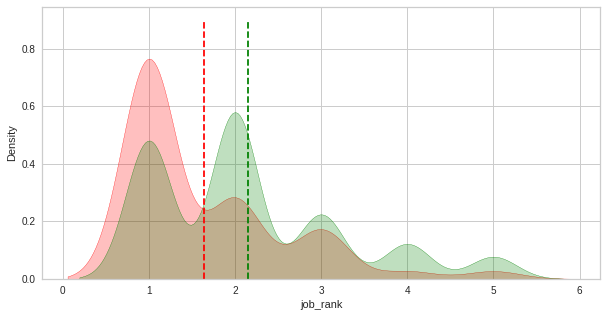

In [370]:
check_distribution_with_mode("job_rank")

====== Mean of score_job_satisfication =======
Will Resign : 2.4683544303797467
Wont Resign : 2.778588807785888

====== Mode of score_job_satisfication =======
Will Resign : 3
Wont Resign : 4



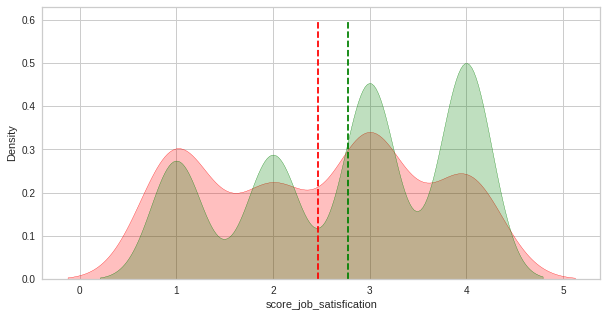

In [371]:
check_distribution_with_mode("score_job_satisfication")

====== Mean of monthly_income =======
Will Resign : 4787.0928270042195
Wont Resign : 6832.739659367397



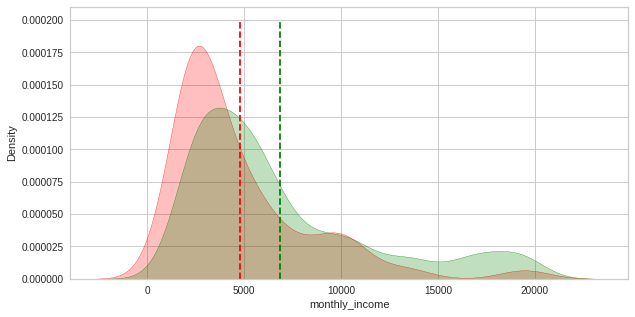

In [372]:
check_distribution("monthly_income")

====== Mean of companies_count =======
Will Resign : 2.940928270042194
Wont Resign : 2.6455798864557987

====== Mode of companies_count =======
Will Resign : 1
Wont Resign : 1



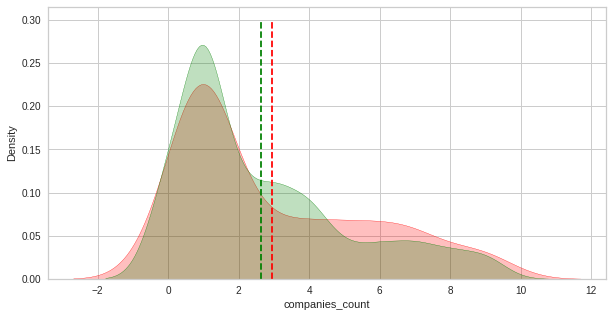

In [373]:
check_distribution_with_mode("companies_count")

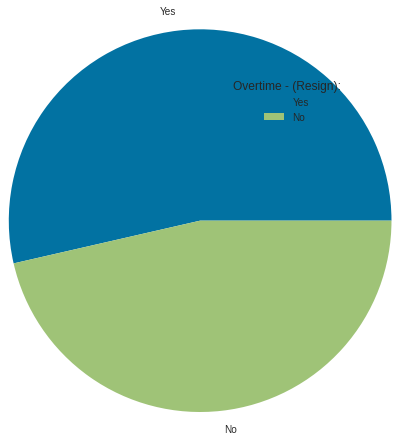

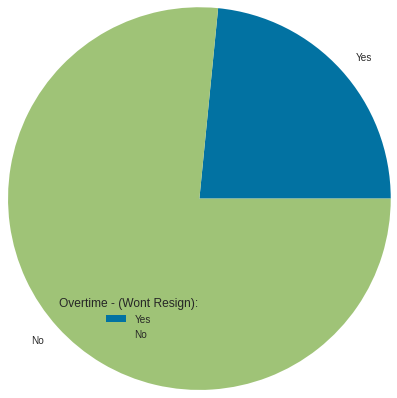

In [374]:
y11 = len(df2_yes[(df2_yes.over_time == "Yes")])
y12 = len(df2_yes[(df2_yes.over_time == "No")])
y21 = len(df2_no[(df2_no.over_time == "Yes")])
y22 = len(df2_no[(df2_no.over_time == "No")])

check_dist_c("Overtime", [y11, y12], [y21, y22], ["Yes", "No"])

====== Mean of salary_increment_percentage =======
Will Resign : 15.09704641350211
Wont Resign : 15.231143552311435



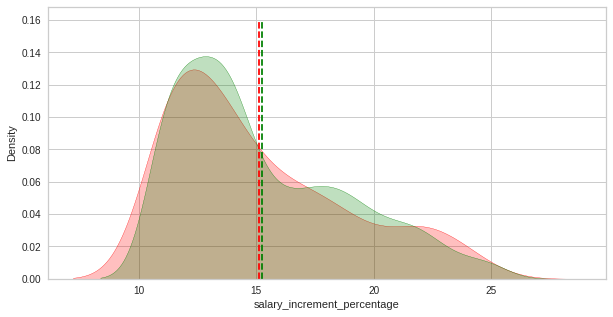

In [375]:
check_distribution("salary_increment_percentage")

====== Mean of rate_performance =======
Will Resign : 3.1561181434599157
Wont Resign : 3.153284671532847

====== Mode of rate_performance =======
Will Resign : 3
Wont Resign : 3



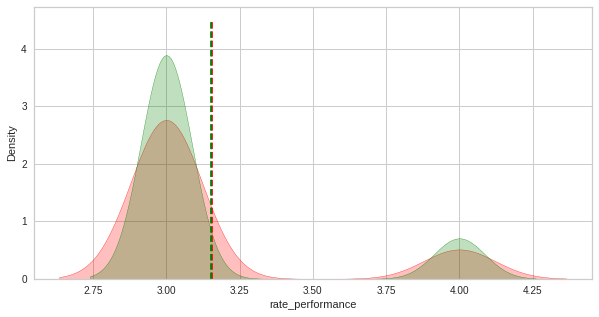

In [376]:
check_distribution_with_mode("rate_performance")

====== Mean of score_work_relationahip =======
Will Resign : 2.5991561181434597
Wont Resign : 2.7339821573398218

====== Mode of score_work_relationahip =======
Will Resign : 3
Wont Resign : 3



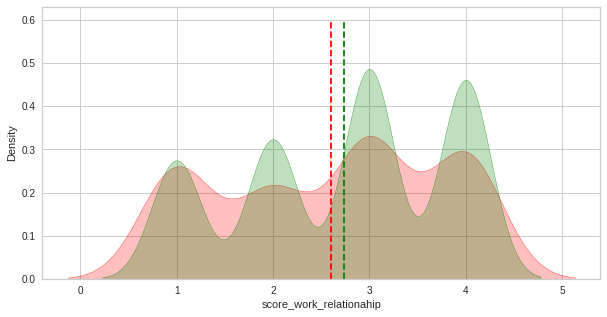

In [377]:
check_distribution_with_mode("score_work_relationahip")

====== Mean of time_total_working =======
Will Resign : 8.244725738396625
Wont Resign : 11.862935928629359



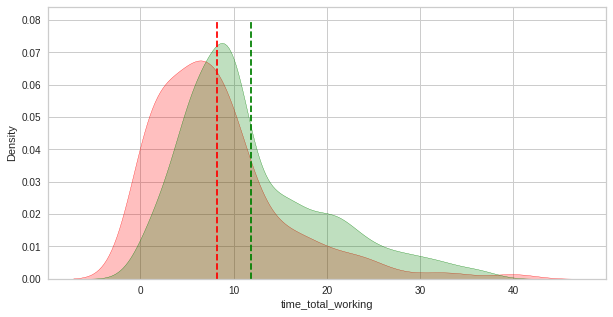

In [378]:
check_distribution("time_total_working")

====== Mean of last_year_training_time =======
Will Resign : 2.6244725738396624
Wont Resign : 2.8329278183292783

====== Mode of last_year_training_time =======
Will Resign : 2
Wont Resign : 2



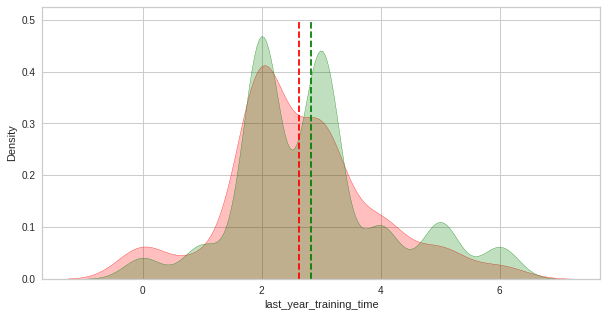

In [379]:
check_distribution_with_mode("last_year_training_time")

====== Mean of score_work_life_balance =======
Will Resign : 2.6582278481012658
Wont Resign : 2.781021897810219

====== Mode of score_work_life_balance =======
Will Resign : 3
Wont Resign : 3



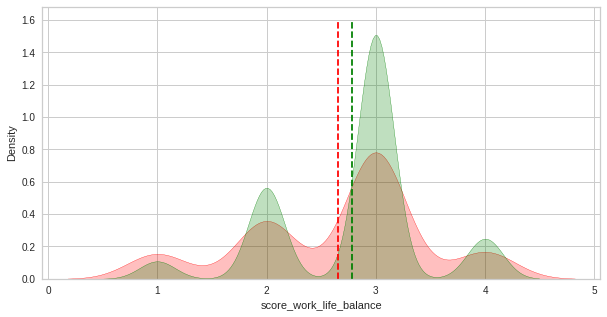

In [380]:
check_distribution_with_mode("score_work_life_balance")

====== Mean of time_current_company =======
Will Resign : 5.1308016877637135
Wont Resign : 7.369018653690187



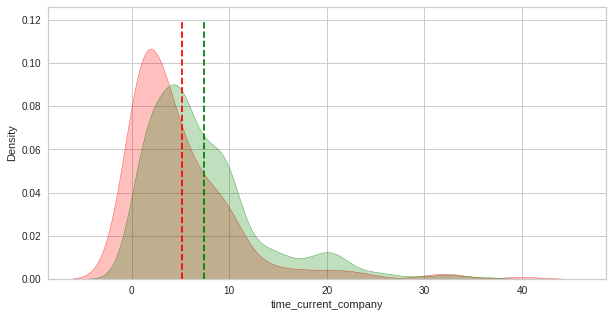

In [381]:
check_distribution("time_current_company")

====== Mean of time_current_role =======
Will Resign : 2.9029535864978904
Wont Resign : 4.484184914841849



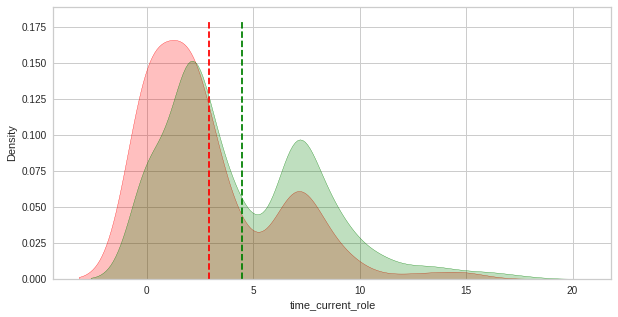

In [382]:
check_distribution("time_current_role")

====== Mean of time_last_promotion =======
Will Resign : 1.9451476793248945
Wont Resign : 2.234387672343877



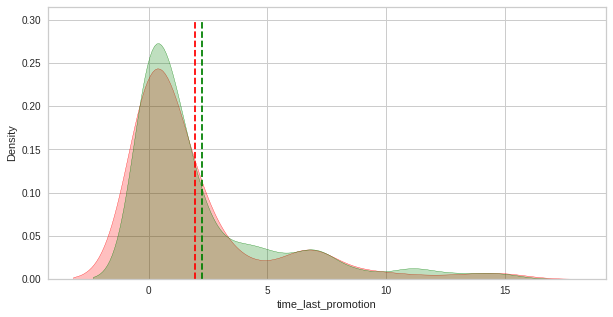

In [383]:
check_distribution("time_last_promotion")

====== Mean of time_current_manager =======
Will Resign : 2.852320675105485
Wont Resign : 4.367396593673966



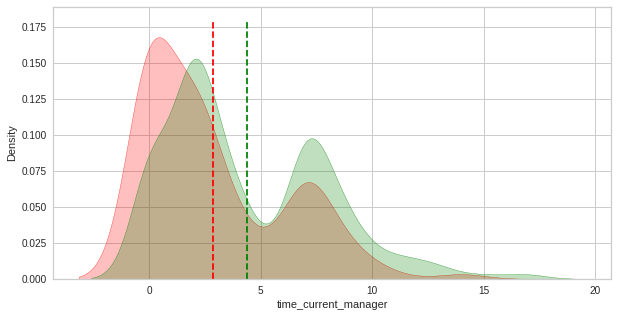

In [384]:
check_distribution("time_current_manager")

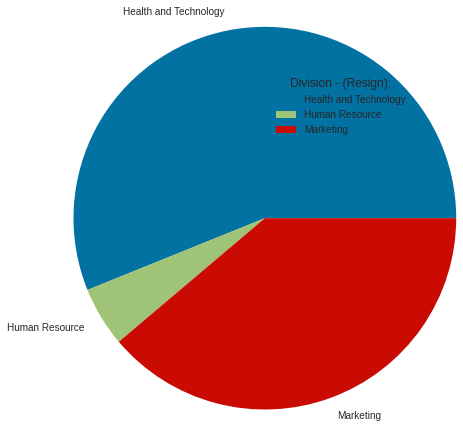

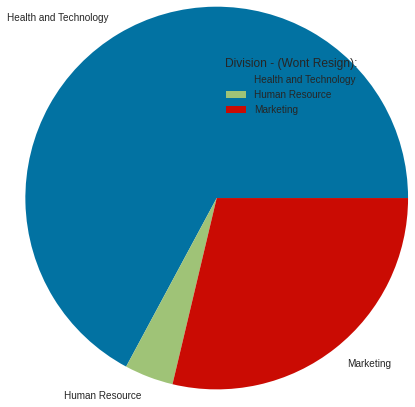

In [385]:
y11 = len(df2_yes[(df2_yes.division == "Health and Technology")])
y12 = len(df2_yes[(df2_yes.division == "Human Resource")])
y13 = len(df2_yes[(df2_yes.division == "Marketing")])

y21 = len(df2_no[(df2_no.division == "Health and Technology")])
y22 = len(df2_no[(df2_no.division == "Human Resource")])
y23 = len(df2_no[(df2_no.division == "Marketing")])

check_dist_c("Division", [y11, y12, y13], [y21, y22, y23], ["Health and Technology", "Human Resource", "Marketing"])

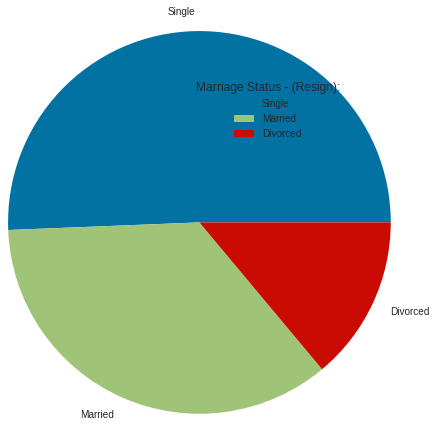

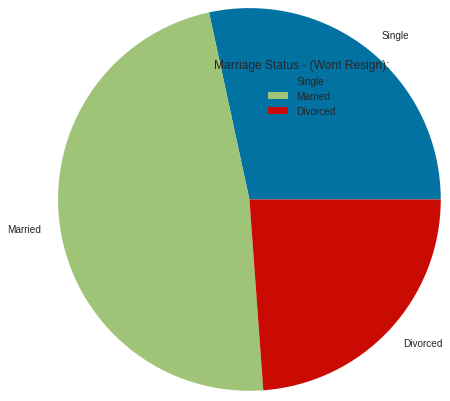

In [386]:
y11 = len(df2_yes[(df2_yes.marriage_status == "Single")])
y12 = len(df2_yes[(df2_yes.marriage_status == "Married")])
y13 = len(df2_yes[(df2_yes.marriage_status == "Divorced")])

y21 = len(df2_no[(df2_no.marriage_status == "Single")])
y22 = len(df2_no[(df2_no.marriage_status == "Married")])
y23 = len(df2_no[(df2_no.marriage_status == "Divorced")])

check_dist_c("Marriage Status", [y11, y12, y13], [y21, y22, y23], ["Single", "Married", "Divorced"])

###B. Apakah karyawan memilih untuk resign setelah mendapatkan promosi?

In [387]:
# Define baru mendapatkan promosi

df2_promotion = df2[(df2.time_last_promotion == 0)]
df2_promotion = df2_promotion[(df2_promotion.time_current_company > 0)]
df2_promotion = df2_promotion[(df2_promotion.job_rank > 1)]

df2_promotion_yes = df2_promotion[(df2_promotion.resign == "Yes")]
df2_promotion_no = df2_promotion[(df2_promotion.resign == "No")]

print("RESIGN      :", len(df2_promotion_yes))
print("WONT RESIGN :", len(df2_promotion_no))

RESIGN      : 29
WONT RESIGN : 275


In [388]:
df2_promotion[["job_rank","time_last_promotion", "time_current_company", "time_current_role"]]

,job_rank,time_last_promotion,time_current_company,time_current_role
0,2,0,6,4
11,2,0,9,5
33,2,0,1,0
48,2,0,9,6
50,3,0,1,0
...,...,...,...,...
1456,2,0,10,2
1459,2,0,4,3
1465,2,0,5,2
1467,2,0,6,2


###C. Departemen manakah yang memiliki karyawan loyal paling banyak?

In [389]:
# Pisah dataset berdasarkan kolom resign.

loyal_treshold = df2["time_current_company"].mean()

df2_marketing = df2[(df2.division == "Marketing")]
df2_hr = df2[(df2.division == "Human Resource")]
df2_hat = df2[(df2.division == "Health and Technology")]

loyal_count_marketing = len(df2_marketing[(df2_marketing.time_current_company >= loyal_treshold)])
loyal_count_hr = len(df2_hr[(df2_hr.time_current_company >= loyal_treshold)])
loyal_count_hat = len(df2_hat[(df2_hat.time_current_company >= loyal_treshold)])

print("Departemen Marketing :", loyal_count_marketing)
print("Departemen HR        :", loyal_count_hr)
print("Departemen H & T     :", loyal_count_hat)

print("================================")

def topercentage(dec):
  return str(round(dec * 100, 2)) + "%"

print("Departemen Marketing :", topercentage(loyal_count_marketing / len(df2_marketing)))
print("Departemen HR        :", topercentage(loyal_count_hr / len(df2_hr)))
print("Departemen H & T     :", topercentage(loyal_count_hat / len(df2_hat)))

Departemen Marketing : 176
Departemen HR        : 20
Departemen H & T     : 332
Departemen Marketing : 39.46%
Departemen HR        : 31.75%
Departemen H & T     : 34.55%


###D. Lakukan analisis korelasi antar atribut, visualisasikan atribut-atribut yang memiliki korelasi. Jika ada, sampaikan pendapat anda mengenai keterkaitan atribut tersebut


In [390]:
from sklearn.preprocessing import LabelEncoder

# Lakukan encoding untuk data kategorikal

df_encoded = df2.copy()

# Label encoding untuk data kategorikal boolean
le = LabelEncoder()
df_encoded["resign"] = le.fit_transform(df_encoded["resign"])
df_encoded["gender"] = le.fit_transform(df_encoded["gender"])
df_encoded["over_time"] = le.fit_transform(df_encoded["over_time"])

# One hot encoding untuk data kategorikal non boolean namun tidak ordinal
df_encoded = pd.get_dummies(df_encoded)

df_encoded.head(30)

,age,resign,home_distance,education,score_environment,gender,hourly_rate,score_contribution,job_rank,score_job_satisfication,...,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_status_Divorced,marriage_status_Married,marriage_status_Single
0,41,1,1,2,2,0,94,3,2,4,...,0,0,0,0,0,1,0,0,0,1
1,49,0,8,1,3,1,61,2,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,2,2,4,1,92,2,1,3,...,1,0,0,0,0,0,0,0,0,1
3,33,0,3,4,4,0,56,3,1,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,2,1,1,1,40,3,1,2,...,1,0,0,0,0,0,0,0,1,0
5,32,0,2,2,4,1,79,3,1,4,...,1,0,0,0,0,0,0,0,0,1
6,59,0,3,3,3,0,81,4,1,1,...,1,0,0,0,0,0,0,0,1,0
7,30,0,24,1,4,1,67,3,1,3,...,1,0,0,0,0,0,0,1,0,0
8,38,0,23,3,4,1,44,2,3,3,...,0,0,1,0,0,0,0,0,0,1
9,36,0,27,3,3,1,94,3,2,3,...,0,0,0,0,0,0,0,0,1,0


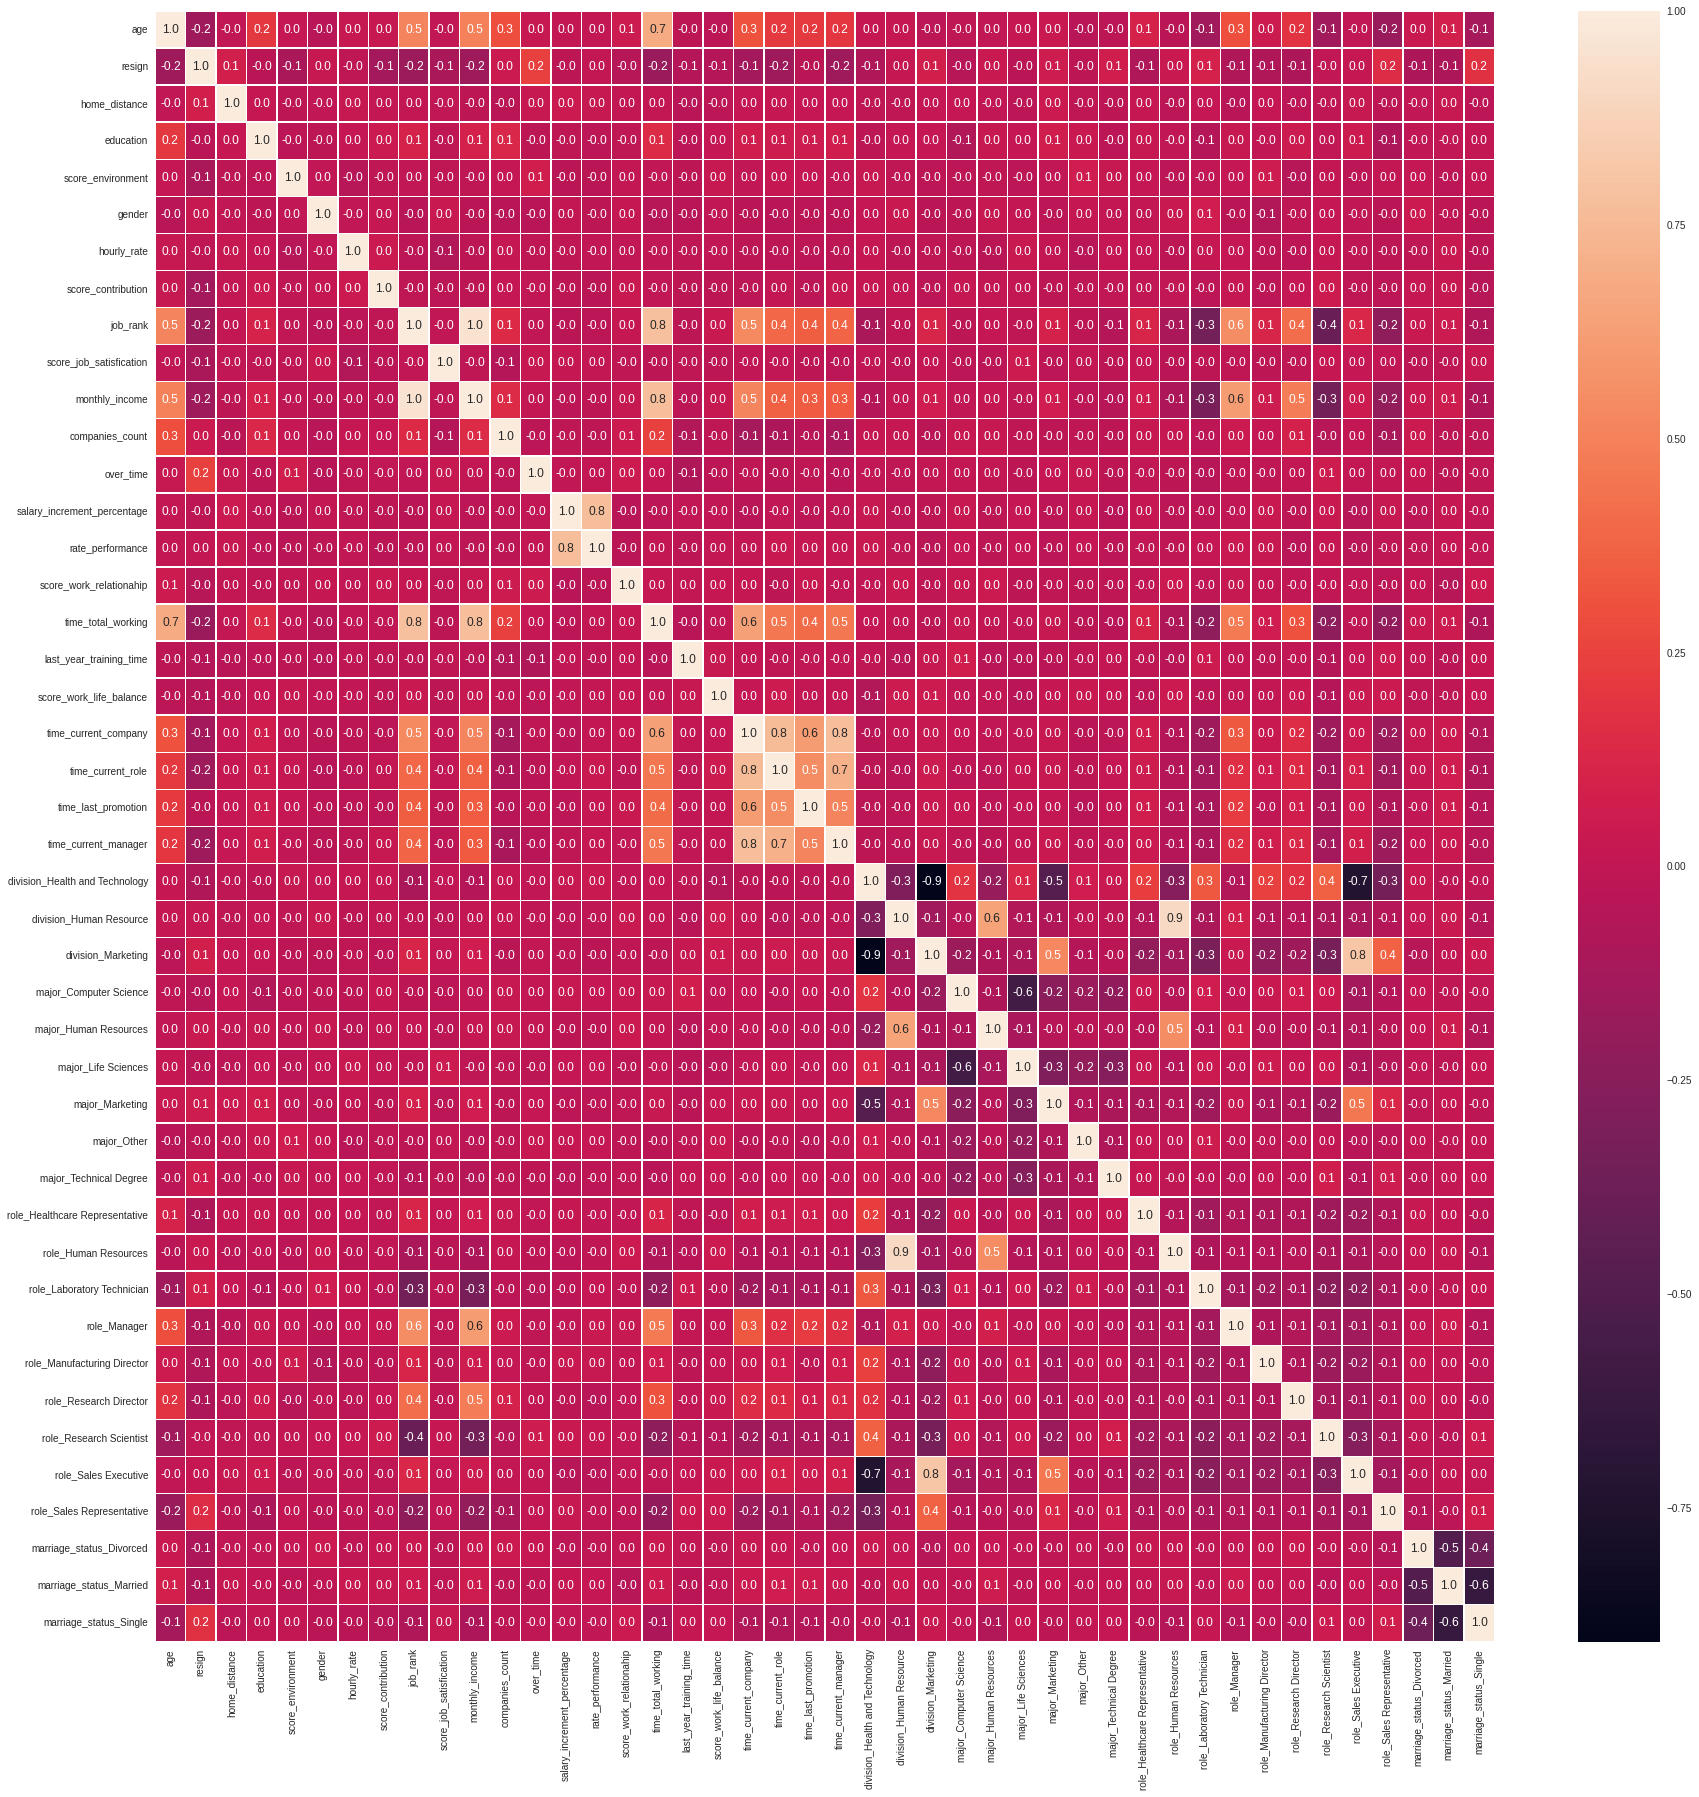

In [391]:
df_corr = df_encoded.corr(method='pearson')
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df_corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [392]:
corr = df_encoded.corr(method='pearson')

columns = df_encoded.columns

for i in range(0, len(columns)):
  for j in range(i + 1, len(columns)):
    if corr[columns[i]][columns[j]] >= 0.5 or corr[columns[i]][columns[j]] <= -0.5:
      print("{:30s} {:30s} {:f}".format(columns[i], columns[j], corr[columns[i]][columns[j]]))

age                            job_rank                       0.509604
age                            time_total_working             0.680381
job_rank                       monthly_income                 0.950300
job_rank                       time_total_working             0.782208
job_rank                       time_current_company           0.534739
job_rank                       role_Manager                   0.552744
monthly_income                 time_total_working             0.772893
monthly_income                 time_current_company           0.514285
monthly_income                 role_Manager                   0.619573
salary_increment_percentage    rate_performance               0.773550
time_total_working             time_current_company           0.628133
time_current_company           time_current_role              0.758754
time_current_company           time_last_promotion            0.618409
time_current_company           time_current_manager           0.769212
time_c

####Age

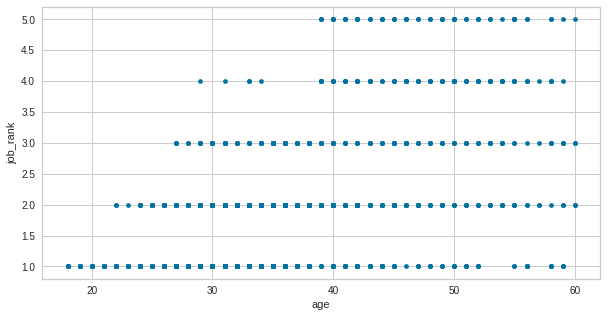

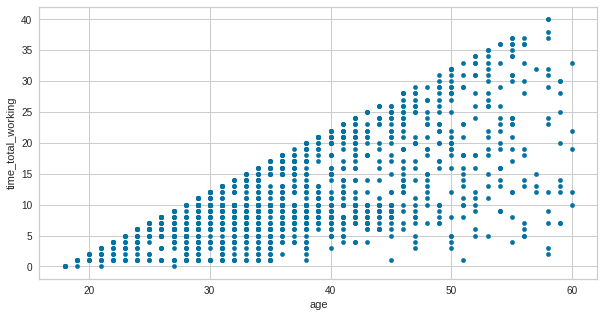

In [393]:
df_encoded.plot.scatter(x="age", y="job_rank", figsize=(10,5))
df_encoded.plot.scatter(x="age", y="time_total_working", figsize=(10,5))

####Job Rank

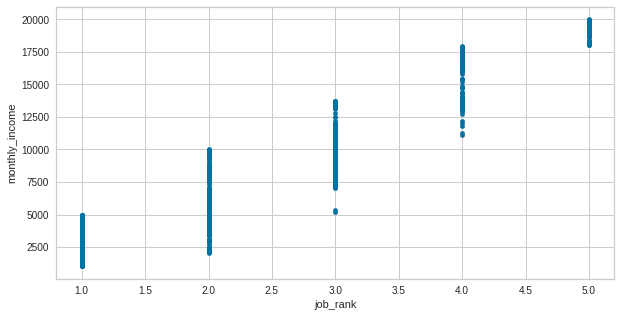

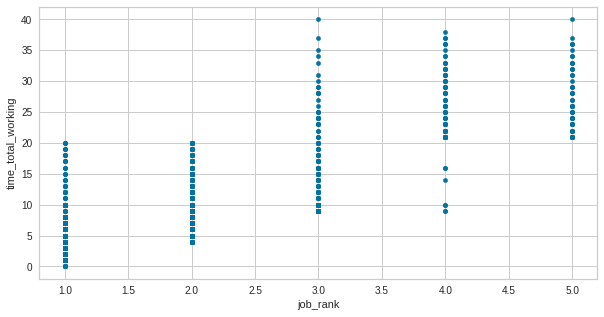

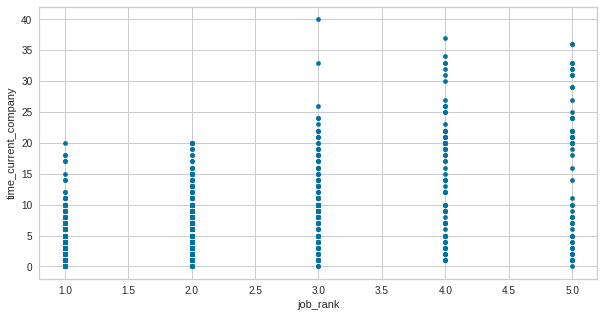

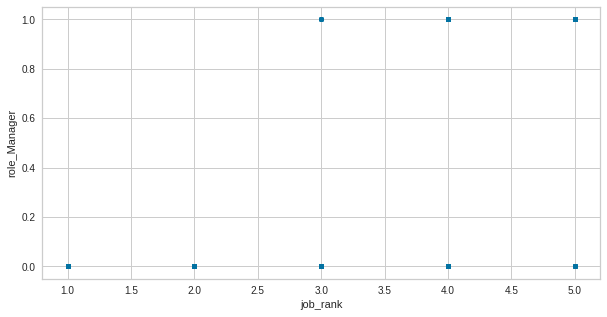

In [394]:
df_encoded.plot.scatter(x="job_rank", y="monthly_income", figsize=(10,5))
df_encoded.plot.scatter(x="job_rank", y="time_total_working", figsize=(10,5))
df_encoded.plot.scatter(x="job_rank", y="time_current_company", figsize=(10,5))
df_encoded.plot.scatter(x="job_rank", y="role_Manager", figsize=(10,5))

####Monthly Income

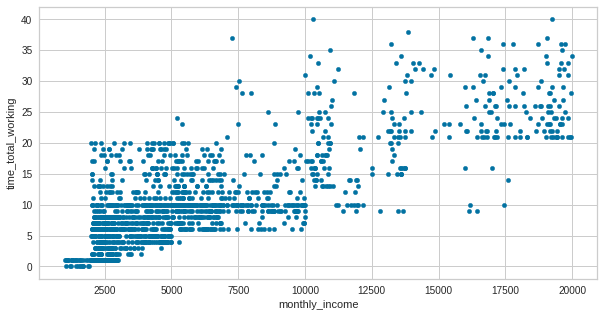

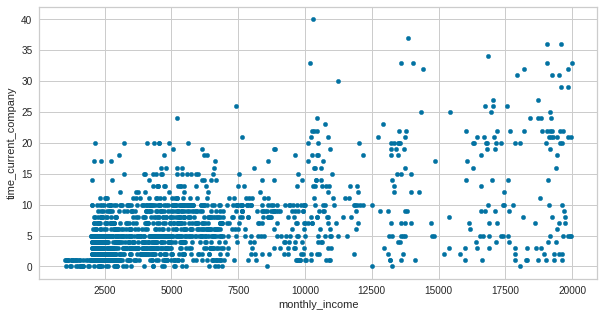

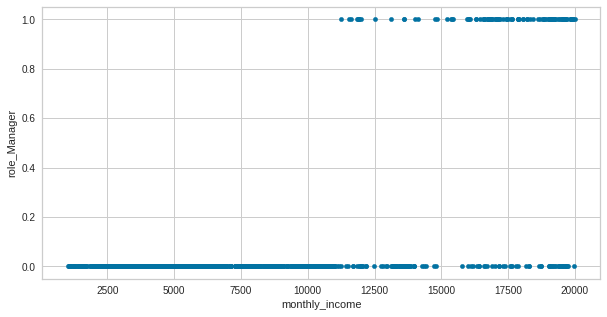

In [395]:
df_encoded.plot.scatter(x="monthly_income", y="time_total_working", figsize=(10,5))
df_encoded.plot.scatter(x="monthly_income", y="time_current_company", figsize=(10,5))
df_encoded.plot.scatter(x="monthly_income", y="role_Manager", figsize=(10,5))

####Salary Increment Percentage

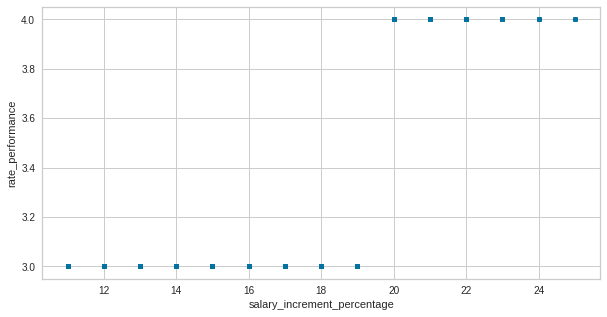

In [396]:
df_encoded.plot.scatter(x="salary_increment_percentage", y="rate_performance", figsize=(10,5))

####Time Total Working

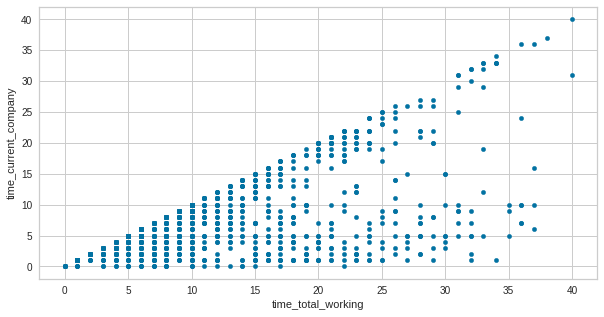

In [397]:
df_encoded.plot.scatter(x="time_total_working", y="time_current_company", figsize=(10,5))

####Time Current Company

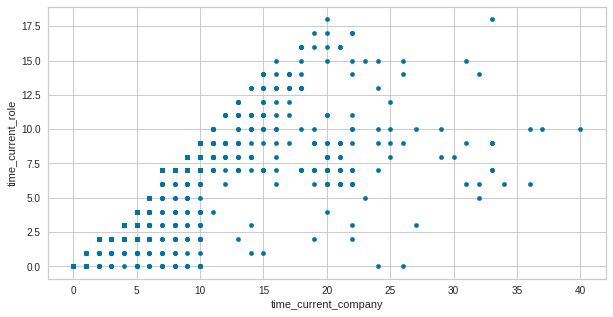

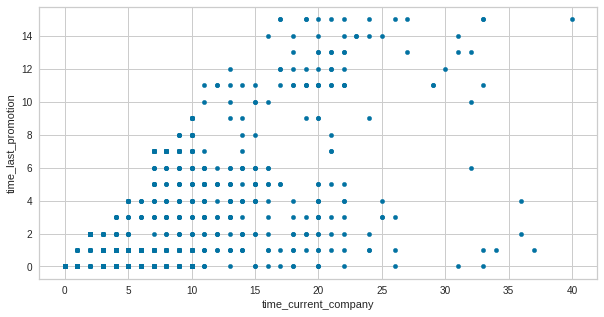

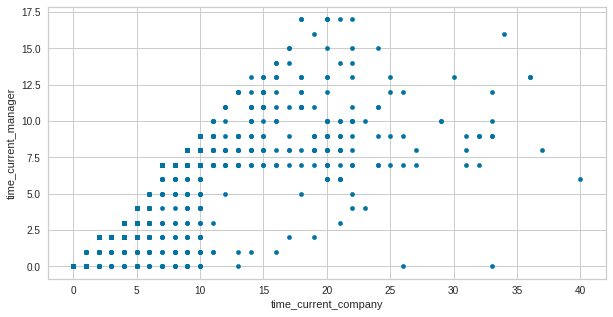

In [398]:
df_encoded.plot.scatter(x="time_current_company", y="time_current_role", figsize=(10,5))
df_encoded.plot.scatter(x="time_current_company", y="time_last_promotion", figsize=(10,5))
df_encoded.plot.scatter(x="time_current_company", y="time_current_manager", figsize=(10,5))

####Time Current Role

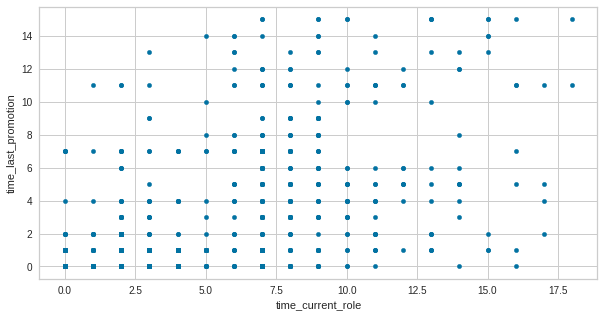

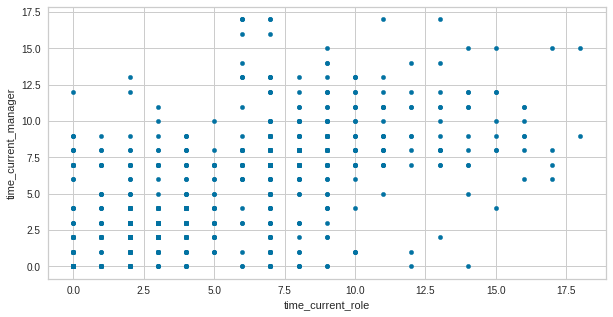

In [399]:
df_encoded.plot.scatter(x="time_current_role", y="time_last_promotion", figsize=(10,5))
df_encoded.plot.scatter(x="time_current_role", y="time_current_manager", figsize=(10,5))

####Time Last Promotion

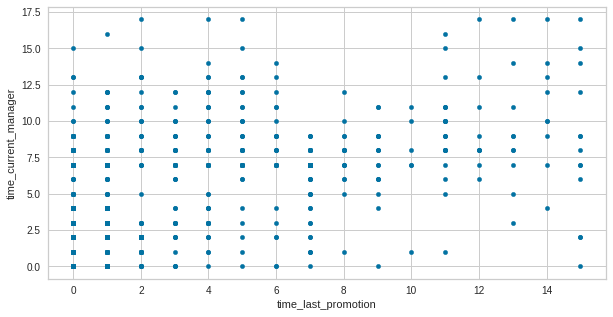

In [400]:
df_encoded.plot.scatter(x="time_last_promotion", y="time_current_manager", figsize=(10,5))

####Human Resource Division

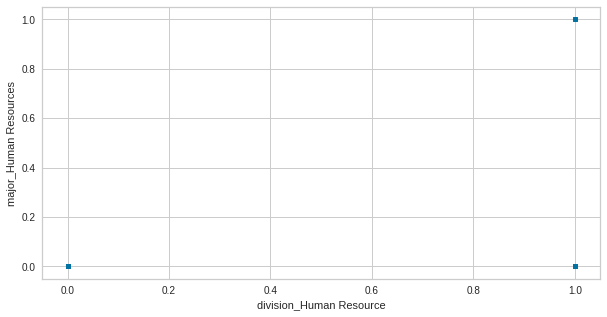

In [401]:
df_encoded.plot.scatter(x="division_Human Resource", y="major_Human Resources", figsize=(10,5))

In [402]:
df_encoded.groupby(["division_Human Resource", "major_Human Resources"]).count()["age"].reset_index()

,division_Human Resource,major_Human Resources,age
0,0,0,1407
1,1,0,36
2,1,1,27


####Marketing Division

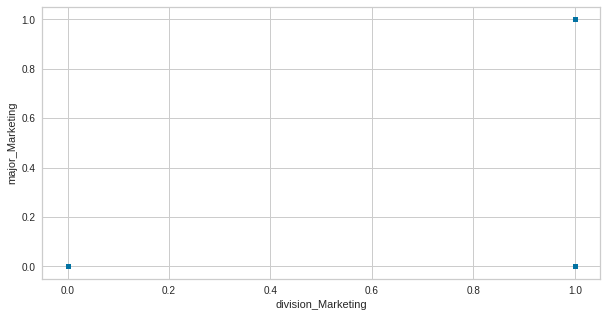

In [403]:
df_encoded.plot.scatter(x="division_Marketing", y="major_Marketing", figsize=(10,5))

In [404]:
df_encoded.groupby(["division_Marketing", "major_Marketing"]).count()["age"].reset_index()

,division_Marketing,major_Marketing,age
0,0,0,1024
1,1,0,287
2,1,1,159


####Human Resources Major

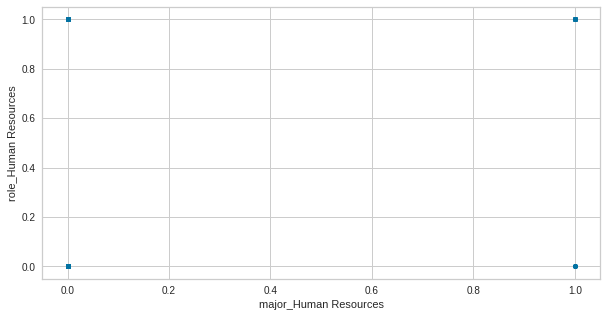

In [405]:
df_encoded.plot.scatter(x="major_Human Resources", y="role_Human Resources", figsize=(10,5))

In [406]:
df_encoded.groupby(["major_Human Resources", "role_Human Resources"]).count()["age"].reset_index()

,major_Human Resources,role_Human Resources,age
0,0,0,1412
1,0,1,31
2,1,0,6
3,1,1,21


##Eksplorasi Tambahan

###1. Apakah penilaian karyawan terhadap dirinya sendiri sebanding dengan penilaian oleh perusahaan?

In [407]:
df2_marketing = df2[(df2.division == "Marketing")]
df2_hr = df2[(df2.division == "Human Resource")]
df2_hat = df2[(df2.division == "Health and Technology")]

sc_marketing = df2_marketing.score_contribution.mean()
sc_hr = df2_hr.score_contribution.mean()
sc_hat = df2_hat.score_contribution.mean()
rp_marketing = df2_marketing.rate_performance.mean()
rp_hr = df2_hr.rate_performance.mean()
rp_hat = df2_hat.rate_performance.mean()

print("======= Marketing =======")
print("SC mean    :", round(sc_marketing, 2))
print("RP mean    :", round(rp_marketing, 2))
print("Difference :", round(abs(sc_marketing - rp_marketing), 2))
print("==== Human Resources ====")
print("SC mean    :", round(sc_hr, 2))
print("RP mean    :", round(rp_hr, 2))
print("Difference :", round(abs(sc_hr - rp_hr), 2))
print("== Health & Technology ==")
print("SC mean    :", round(sc_hat, 2))
print("RP mean    :", round(rp_hat, 2))
print("Difference :", round(abs(sc_hat - rp_hat), 2))

======= Marketing =======
SC mean    : 2.7
RP mean    : 3.14
Difference : 0.43
==== Human Resources ====
SC mean    : 2.75
RP mean    : 3.14
Difference : 0.4
== Health & Technology ==
SC mean    : 2.74
RP mean    : 3.16
Difference : 0.42


###2. Role apa yang mempunyai gaji Entry Level paling tinggi?

In [408]:
df2_rank_1 = df2[(df2.job_rank == 1)]
print(df2_rank_1["role"].unique())

['Laboratory Technician' 'Research Scientist' 'Sales Representative'
 'Human Resources']


In [409]:
lt_mean = df2_rank_1[(df2_rank_1.role == "Laboratory Technician")]["monthly_income"].mean()
rs_mean = df2_rank_1[(df2_rank_1.role == "Research Scientist")]["monthly_income"].mean()
sr_mean = df2_rank_1[(df2_rank_1.role == "Sales Representative")]["monthly_income"].mean()
hr_mean = df2_rank_1[(df2_rank_1.role == "Human Resources")]["monthly_income"].mean()

print("Laboratory Technician :", round(lt_mean, 2))
print("Research Scientist    :", round(rs_mean, 2))
print("Sales Representative  :", round(sr_mean, 2))
print("Human Resources       :", round(hr_mean, 2))

Laboratory Technician : 2854.59
Research Scientist    : 2827.65
Sales Representative  : 2506.72
Human Resources       : 2733.21


#Nomor 2 - Prediction Model

In [410]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [411]:
def report(y_test, y_pred):
  print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, y_pred,zero_division=0)))
  print("Informasi lebih lengkap")
  print('F1 Macro Average:', f1_score(y_test, y_pred, average='macro'))
  print('F1 Micro Average:', f1_score(y_test, y_pred, average='micro'))
  print('Precision Macro Average:', precision_score(y_test, y_pred, average='macro',zero_division=0))
  print('Precision Micro Average:', precision_score(y_test, y_pred, average='micro',zero_division=0))
  print('Recall Macro Average:', recall_score(y_test, y_pred, average='macro',zero_division=0))
  print('Recall Micro Average:', recall_score(y_test, y_pred, average='micro',zero_division=0))
  print()

In [412]:
def confusion_matrix(actual, prediction):
  print("Confusion Matrix")
  print()
  matrix_actual = pd.Series(np.array(actual), name = "Actual")
  matrix_prediction = pd.Series(np.array(prediction), name = "Prediction")
  df_confusion = pd.crosstab(matrix_actual, matrix_prediction)
  display(df_confusion)

In [413]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def metrics(y_test,prediction):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

##Preprocessing

In [414]:
df_processed = df.copy()

In [415]:
# Membuang kolom yang tidak diperlukan

df_processed = df_processed.drop('underage', axis=1)
df_processed = df_processed.drop('working_hours', axis=1)
df_processed = df_processed.drop('employee_id', axis=1)

In [416]:
# Mengecek nilai null

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
        
    else:
        print(missing_data[missing_data['Total'] > 0])

cek_null(df_processed)

Tidak ditemukan missing value pada dataset


In [417]:
# Mengecek keberadaan nilai duplikat

print("Jumlah duplikasi data : " + str(df_processed.duplicated().sum()))

Jumlah duplikasi data : 0


In [418]:
# Mencari outlier
 
Q3 = df_processed.quantile(0.75)
Q1 = df_processed.quantile(0.25)
IQR = Q3-Q1

Jumlah_Outlier = []

for col in df_processed.select_dtypes(np.number).columns:
    outliers = ((df_processed[col] < (Q1[col] - 1.5 * IQR[col])) | (df_processed[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier.append([col, outliers, outliers/len(df_processed)])
    
indexOutput = list(range(0, len(Jumlah_Outlier)))

pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Outlier','persentase'],index=indexOutput).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,last_year_training_time,238,0.161905
1,rate_performance,226,0.153741
2,monthly_income,114,0.077551
3,time_last_promotion,107,0.072789
4,time_current_company,104,0.070748
5,time_total_working,63,0.042857
6,companies_count,52,0.035374
7,time_current_role,21,0.014286
8,time_current_manager,14,0.009524
9,score_work_life_balance,0,0.000000


In [419]:
df_processed.skew(axis = 0, skipna = True)

<ipython-input-419-ec2dc7fdb642>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_processed.skew(axis = 0, skipna = True)


age                            0.413286
home_distance                  0.958118
education                     -0.289681
score_environment             -0.321654
hourly_rate                   -0.032311
score_contribution            -0.498419
job_rank                       1.025401
score_job_satisfication       -0.329672
monthly_income                 1.369817
companies_count                1.026471
salary_increment_percentage    0.821128
rate_performance               1.921883
score_work_relationahip       -0.302828
time_total_working             1.117172
last_year_training_time        0.553124
score_work_life_balance       -0.552480
time_current_company           1.764529
time_current_role              0.917363
time_last_promotion            1.984290
time_current_manager           0.833451
dtype: float64

In [420]:
# Melakukan encoding untuk dataset

# Label encoding untuk data kategorikal boolean
le = LabelEncoder()
df_processed["resign"] = le.fit_transform(df_processed["resign"])
df_processed["gender"] = le.fit_transform(df_processed["gender"])
df_processed["over_time"] = le.fit_transform(df_processed["over_time"])

# One hot encoding untuk data kategorikal non boolean namun tidak ordinal
df_processed = pd.get_dummies(df_processed)

##1. Lakukan prediksi untuk mengetahui apakah karyawan akan resign atau tidak di perusahaan tersebut. Bagaimana hasil prediksi anda dapat membantu perusahaan dalam mengambil keputusan?

In [421]:
X1 = df_processed.drop('resign', axis=1)
y1 = df_processed['resign']

In [422]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 123)

In [423]:
scaler = MinMaxScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [424]:
logisticRegressionModel1 = LogisticRegression()
logisticRegressionModel1.fit(X1_train_scaled, y1_train)
prediction1 = logisticRegressionModel1.predict(X1_test_scaled)

In [425]:
confusion_matrix(y1_test, prediction1)

Confusion Matrix



Prediction,0,1
Actual,,
0,248,8
1,22,16


In [426]:
report(y1_test, prediction1)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       256
           1       0.67      0.42      0.52        38

    accuracy                           0.90       294
   macro avg       0.79      0.69      0.73       294
weighted avg       0.89      0.90      0.89       294


Informasi lebih lengkap
F1 Macro Average: 0.7295474058628726
F1 Micro Average: 0.8979591836734694
Precision Macro Average: 0.7925925925925925
Precision Micro Average: 0.8979591836734694
Recall Macro Average: 0.6949013157894737
Recall Micro Average: 0.8979591836734694



##2. Lakukan prediksi untuk mengetahui berapa lama seorang karyawan akan bertahan di perusahaan tersebut. Bagaimana hasil prediksi anda dapat membantu perusahaan dalam mengambil keputusan?

In [427]:
# Mengambil dataset yang berisi hanya orang yang resign

df_yes = df_processed.copy()
df_yes = df_yes[(df_yes.resign == 1)]

In [428]:
# Menjadikan time_current_company sebagai target variable

X2 = df_yes.drop('time_current_company', axis=1)
y2 = df_yes['time_current_company']

In [429]:
# Split dataset menjadi train dan test

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2 , test_size=0.2, random_state=43)

In [430]:
non_categorical = ['age', 'home_distance', 'hourly_rate', 'monthly_income', 'companies_count','salary_increment_percentage','time_total_working',
       'last_year_training_time', 'time_current_role', 'time_last_promotion','time_current_manager']

scaler = MinMaxScaler()

X2_train_scaled = X2_train.copy()
X2_test_scaled = X2_test.copy()

X2_train_scaled[non_categorical] = scaler.fit_transform(X2_train_scaled[non_categorical])
X2_test_scaled[non_categorical] = scaler.transform(X2_test_scaled[non_categorical])

###Linear Regression

In [431]:
linearModel = LinearRegression()
linearModel.fit(X2_train_scaled, y2_train)
linear_prediction = linearModel.predict(X2_test_scaled)

In [432]:
metrics(y2_test, linear_prediction)

MAE: 2.022176180353666
MSE: 7.191215380449957
RMSE: 2.681644156194098
R_squared: 0.8214517841657324


###Lasso Regression

In [433]:
alphas = np.arange(0.1, 10, 0.1)
best_alpha = 0
best_r2 = -999

for i in alphas:
  lassoModel = Lasso(alpha = i)
  lassoModel.fit(X2_train_scaled, y2_train)
  lasso_prediction = lassoModel.predict(X2_test_scaled)
  if r2_score(y2_test, lasso_prediction) > best_r2:
    best_alpha = i
    best_r2 = r2_score(y2_test, lasso_prediction)

print(best_alpha)
print(best_r2)

0.1
0.837590177645723


In [434]:
lassoModel = Lasso(alpha=best_alpha)
lassoModel.fit(X2_train_scaled, y2_train)
lasso_prediction = lassoModel.predict(X2_test_scaled)
metrics(y2_test, lasso_prediction)

MAE: 1.6672751143055498
MSE: 6.541224772216793
RMSE: 2.5575818212164383
R_squared: 0.837590177645723


In [435]:
lassoModel.coef_

array([ 0.        ,  0.        , -0.        ,  0.41719999,  0.03472037,
       -0.19208172,  0.        , -0.03813788,  0.91253454,  0.2683709 ,
        0.        , -0.63794508, -0.42003116, -0.        , -0.        ,
        0.0232854 ,  9.13831673,  0.        , -0.        ,  6.33087417,
        3.42161982,  5.02902641,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.68747612,  0.        ,
       -0.        ,  0.        , -0.        ])

In [436]:
selected_columns = []

for i in range(len(X2_test_scaled.columns)):
    if(lassoModel.coef_[i] != 0):
        selected_columns.append(X2_test_scaled.columns[i])

selected_columns

['education',
 'score_environment',
 'gender',
 'score_contribution',
 'job_rank',
 'score_job_satisfication',
 'companies_count',
 'over_time',
 'score_work_relationahip',
 'time_total_working',
 'time_current_role',
 'time_last_promotion',
 'time_current_manager',
 'role_Sales Executive']

###Random Forrest Regression

In [437]:
X2 = df_yes[selected_columns]
y2 = df_yes['time_current_company']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2 , test_size=0.2, random_state=43)

In [438]:
randomForestModel = RandomForestRegressor(random_state=43)
randomForestModel.fit(X2_train, y2_train)

prediction2 = randomForestModel.predict(X2_test)
metrics(y2_test, prediction2)

MAE: 1.0291666666666668
MSE: 3.628200000000001
RMSE: 1.9047834522590752
R_squared: 0.909916668821932


In [439]:
param_grid = {'criterion': ['squared_error', 'friedman_mse','poisson'],
               'min_samples_split': [2, 5, 7],
               'max_depth' : [1, 3, None],
               'min_samples_leaf':[1,2,3],
               }

rf = RandomForestRegressor()

clf = GridSearchCV(estimator= rf, 
                   param_grid=param_grid, cv= 5)

clf.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'poisson'],
                         'max_depth': [1, 3, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 7]})

In [440]:
clf.best_params_

{'criterion': 'friedman_mse',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 7}

In [441]:
randomForestModel = RandomForestRegressor(criterion="friedman_mse", max_depth=None, min_samples_leaf=1, min_samples_split=7)
randomForestModel.fit(X2_train, y2_train)

prediction2 = randomForestModel.predict(X2_test)
metrics(y2_test, prediction2)

MAE: 1.0085934875309877
MSE: 3.7053699857506346
RMSE: 1.9249337613930082
R_squared: 0.9080006417607498


##3. Lakukan analisis cluster yang dapat terbentuk pada data karyawan. Deskripsikan karakteristik masing-masing cluster yang didapatkan!

In [442]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [443]:
df_cluster = df_encoded.copy()

X = df_cluster[['score_contribution', 'rate_performance']]

Pemilihan kedua atribut di atas berdasarkan keinginan kelompok kami yang ingin melakukan clustering dengan mengelompokkan karyawan berdasarkan kinerja karyawan tersebut. Kinerja karyawan tersebut dilihat dari 2 pandangan, yaitu berdasarkan kesadaran akan kontribusi dari karyawan itu sendiri (score_contribution) dan nilai performa yang sebenarnya terjadi (rate_performance).

For n_clusters = 2 The average silhouette_coefficient is : 0.6811564500776113
For n_clusters = 3 The average silhouette_coefficient is : 0.7388088717706315
For n_clusters = 4 The average silhouette_coefficient is : 0.8495339044516258
For n_clusters = 5 The average silhouette_coefficient is : 0.9082986706027218
For n_clusters = 6 The average silhouette_coefficient is : 0.9582762154190726


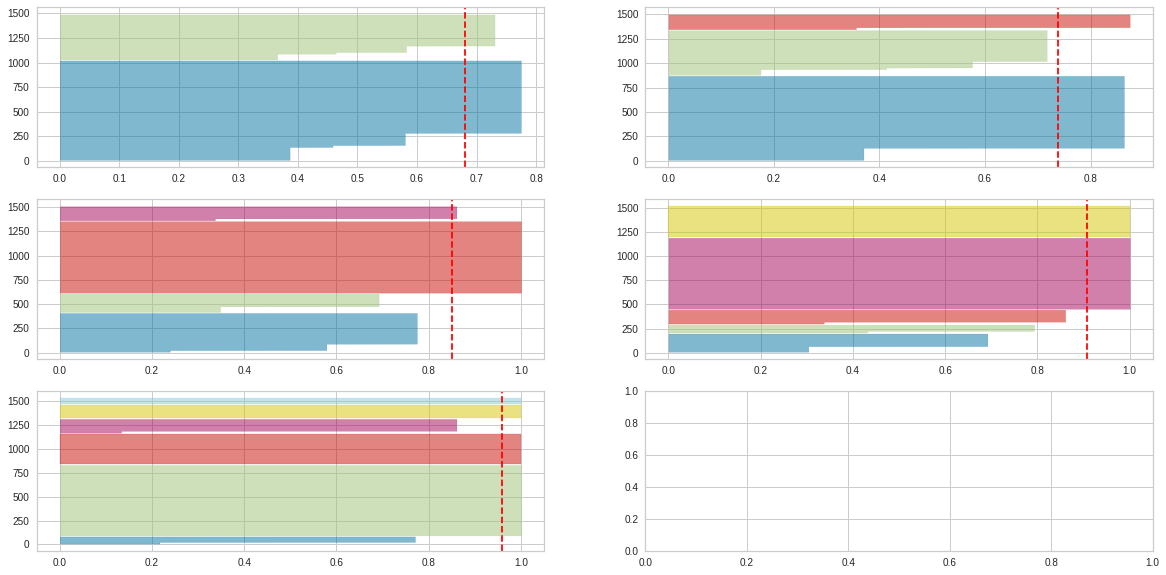

In [444]:
fig, ax = plt.subplots(3, 2, figsize=(20,10))
for k in [2, 3, 4, 5, 6]:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

In [445]:
kmeans = KMeans(n_clusters=2)
cluster_assignment = kmeans.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy(), columns=('score_contribution', 'rate_performance'))
data_with_clusters['Clusters'] = cluster_assignment 

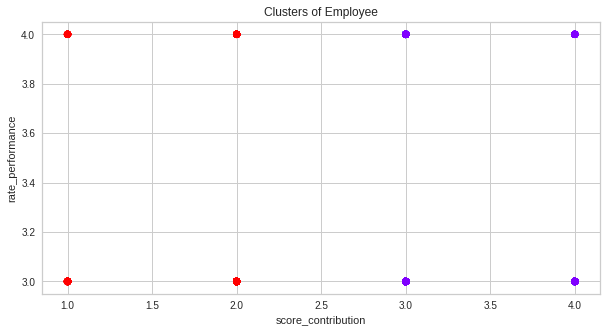

In [446]:
# Create figure
fig = plt.figure(figsize = (10, 5))
ax = plt.axes()

# Prepare data
x = data_with_clusters['score_contribution']
y = data_with_clusters['rate_performance']
cluster = data_with_clusters['Clusters']
 
# Create plot
ax.scatter(x, y, c = cluster, cmap = "rainbow")
plt.title("Clusters of Employee")
ax.set_xlabel('score_contribution')
ax.set_ylabel('rate_performance')

# Show plot
plt.show()

Cluster 1 adalah cluster karyawan yang memiliki nilai kepuasan akan kontribusi yang diberikan kepada perusahaannya tergolong sangat rendah atau rendah, akan tetapi memiliki nilai performa yang tergolong tinggi dan sangat tinggi.

Cluster 2 adalah cluster karyawan yang memiliki nilai kepuasan akan kontribusi yang diberikan kepada perusahaannya tergolong tinggi dan sangat tinggi yang juga sesuai dengan nilai performa yang tergolong tinggi dan sangat tinggi.